In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading the dataset

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
cp -r '/content/gdrive/MyDrive/Chicago_Crimes_2012_to_2017.csv' '/content'

In [7]:
original_df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv') #this file size is of size 240mb

In [8]:
original_df.head()

,Initial,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05-03-2016 23:40,013XX S SAWYER AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05-10-2016 15:56,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05-03-2016 21:40,061XX S DREXEL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05-10-2016 15:56,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05-03-2016 23:31,053XX W CHICAGO AVE,470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05-10-2016 15:56,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05-03-2016 22:10,049XX W FULTON ST,460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05-10-2016 15:56,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05-03-2016 22:00,003XX N LOTUS AVE,820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,6,1139890.0,1901675.0,2016,05-10-2016 15:56,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [9]:
original_df.shape

(1048575, 23)

In [10]:
original_df.dtypes

Initial                   int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

# Dealing with the missing values

In [11]:
original_df.isnull().sum()

Initial                    0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     648
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Ward                      13
Community Area            40
FBI Code                   0
X Coordinate            8705
Y Coordinate            8705
Year                       0
Updated On                 0
Latitude                8705
Longitude               8705
Location                8705
dtype: int64

In [12]:
import statistics
from statistics import mode
def mostOccur(l):
    return mode(l)       

In [14]:
X_C = original_df['X Coordinate']
Y_C = original_df['Y Coordinate']
lat = original_df['Latitude']
long = original_df['Longitude']
ward = original_df['Ward']
CA = original_df['Community Area']
freq_occur_X_C = mostOccur(X_C)
freq_occur_Y_C = mostOccur(Y_C)
freq_occur_lat = mostOccur(lat)
freq_occur_long = mostOccur(long)
freq_occur_ward = mostOccur(ward)
freq_occur_CA = mostOccur(CA)

In [16]:
original_df['X Coordinate'] = original_df['X Coordinate'].fillna(freq_occur_X_C)
original_df['Y Coordinate'] = original_df['Y Coordinate'].fillna(freq_occur_Y_C)
original_df['Latitude'] = original_df['Latitude'].fillna(freq_occur_lat)
original_df['Longitude'] =original_df['Longitude'].fillna(freq_occur_long)
original_df['Ward'] = original_df['Ward'].fillna(freq_occur_ward)
original_df['Community Area'] =original_df['Community Area'].fillna(freq_occur_CA)

In [17]:
original_df.isnull().sum()

Initial                    0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     648
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                8705
dtype: int64

In [18]:
original_df = original_df.drop('Location Description',axis=1)

In [19]:
original_df['Location'] = original_df['Location'].ffill(axis=0)

In [20]:
original_df.isnull().sum()

Initial           0
ID                0
Case Number       0
Date              0
Block             0
IUCR              0
Primary Type      0
Description       0
Arrest            0
Domestic          0
Beat              0
District          1
Ward              0
Community Area    0
FBI Code          0
X Coordinate      0
Y Coordinate      0
Year              0
Updated On        0
Latitude          0
Longitude         0
Location          0
dtype: int64

In [21]:
original_df = original_df.dropna(axis=0)

In [22]:
original_df.shape

(1048574, 22)

# Plotting

{'boxes': [<matplotlib.lines.Line2D at 0x7f7c0f3b5490>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7c0f3b1510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7c0f3b2550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7c0f3b1fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7c0f3b5a90>,
  <matplotlib.lines.Line2D at 0x7f7c0f3b5f90>]}

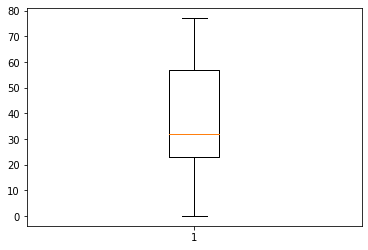

In [23]:
plt.boxplot(original_df['Community Area'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f7c0d847210>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7c0d863290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7c0d86c2d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7c0d863d50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7c0d8477d0>,
  <matplotlib.lines.Line2D at 0x7f7c0d847d10>]}

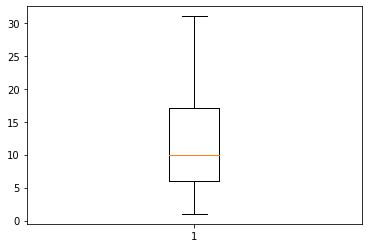

In [24]:
plt.boxplot(original_df['District'])

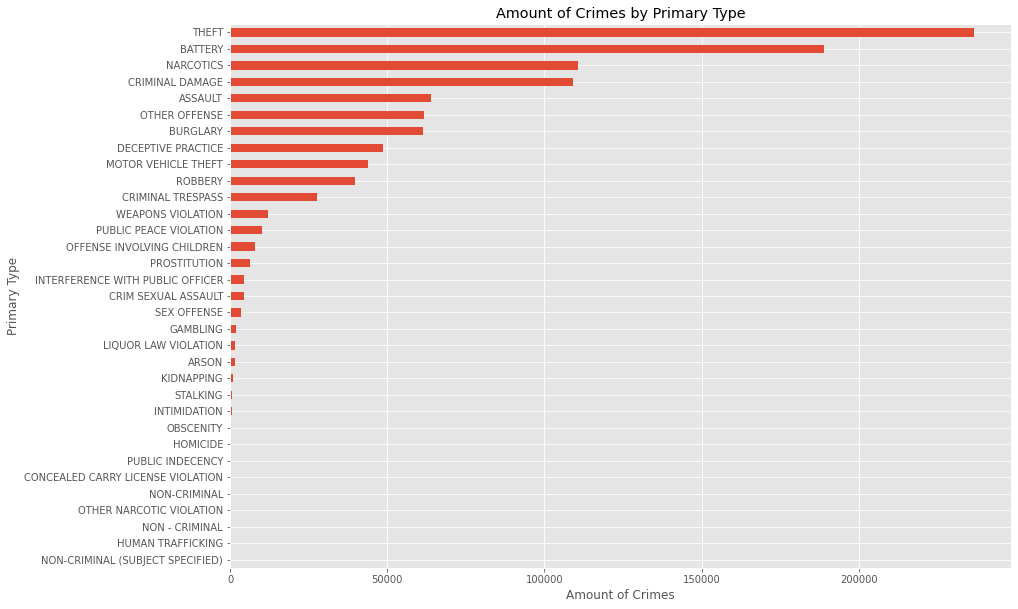

In [ ]:
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
original_df.groupby([original_df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

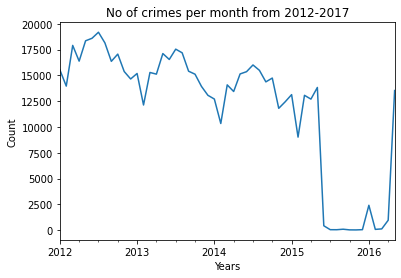

In [36]:
original_df['Date'] = pd.to_datetime(original_df['Date'], format='%m/%d/%Y %I:%M:%S %p',errors='coerce')
# df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
original_df.index = pd.DatetimeIndex(original_df['Date']) 
original_df.resample('M').size().plot(legend=False) # resampling time series by month
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('No of crimes per month from 2012-2017')
plt.show()

Text(0, 0.5, '')

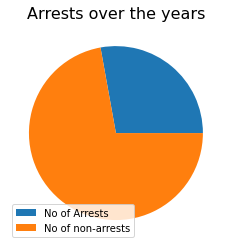

In [37]:
Arrests = original_df['Arrest']
Arrests_true = []
Arrests_false = []
for i in Arrests:
    if i == True:
        Arrests_true.append(i)
    else:
        Arrests_false.append(i)
total = np.array([len(Arrests_true),len(Arrests_false)])
plt.pie(total)
plt.legend(labels=['No of Arrests','No of non-arrests'])
plt.title('Arrests over the years', fontsize=16)
plt.ylabel('')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

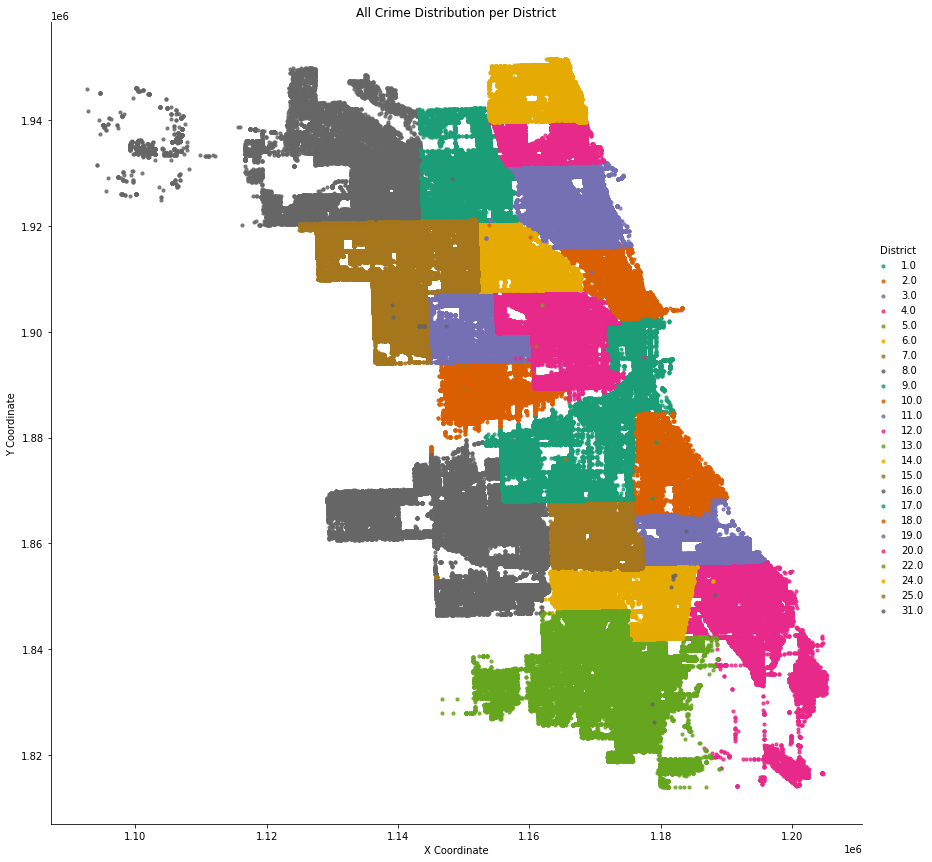

In [38]:
crime_data = original_df.loc[(original_df['X Coordinate']!=0)]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crime_data[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

In [56]:
import folium
from folium import plugins

In [60]:
def toString(x):
    return str(int(x))

df = original_df.groupby(['District']).count().Arrest.reset_index()
df['District'] = df['District'].apply(toString)

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=8)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='/content/gdrive/MyDrive/chicago.geojson',
    name='choropleth',
    data=df,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of crimes per Police District : 2012-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Modeling

In [ ]:
df  = original_df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039231 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Initial               1039231 non-null  int64  
 1   ID                    1039231 non-null  int64  
 2   Case Number           1039231 non-null  object 
 3   Date                  1039231 non-null  object 
 4   Block                 1039231 non-null  object 
 5   IUCR                  1039231 non-null  object 
 6   Primary Type          1039231 non-null  object 
 7   Description           1039231 non-null  object 
 8   Location Description  1039231 non-null  object 
 9   Arrest                1039231 non-null  bool   
 10  Domestic              1039231 non-null  bool   
 11  Beat                  1039231 non-null  int64  
 12  District              1039231 non-null  float64
 13  Ward                  1039231 non-null  float64
 14  Community Area        1039231 non-

In [ ]:
cont = df._get_numeric_data().columns
print("The continuous variables are: ",list(cont))

The continuous variables are:  ['Initial', 'ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']


In [ ]:
print("The categorical variables are: ",list(set(df.columns) - set(cont)))

The categorical variables are:  ['Location Description', 'Location', 'IUCR', 'Updated On', 'Case Number', 'Date', 'FBI Code', 'Primary Type', 'Block', 'Description']


In [ ]:
t = df['Date'][20]
print(t)
s1 = t[:11] 
print(s1)
s2 = t[11:]
print(s2)

print(s2)
hr = s2[:2]
mins = s2[3:5]
sec = s2[6:8]
time_frame = s2[9:]
if(time_frame == 'PM'):
    if (int(hr) != 12):
        hr = str(int(hr) + 12)
else:
    if(int(hr) == 12):
        hr = '00'

print(hr, mins, sec)

05-03-2016 23:37
05-03-2016 
23:37
23:37
23 37 


In [ ]:
month = s1[:2]
date = s1[3:5]
year = s1[6:10]

print(year,month,date,hr,mins,sec)
# print(int(sec))
final_date = datetime(int(year), int(month), int(date), int(hr), int(mins) )
# print(final_date)

2016 05 03 23 37 


In [ ]:
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), 0)
    return final_date

In [ ]:
df['Date'] = df['Date'].apply(time_convert)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def month(x):
    return x.strftime("%B")
df['Month'] = df['Date'].apply(month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


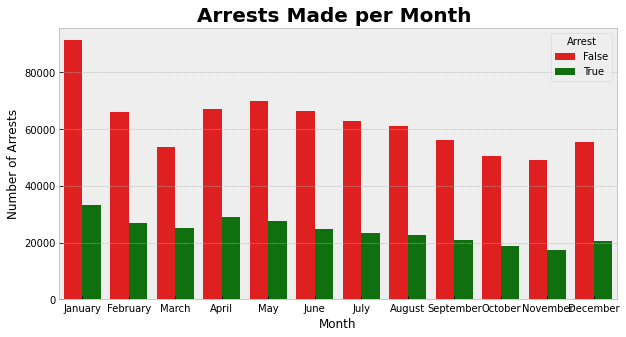

In [ ]:
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df[['Month','Arrest']],
                   palette=['Red', 'Green'])
months = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    

ax.set(title='Arrests Made per Month ', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month ', fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


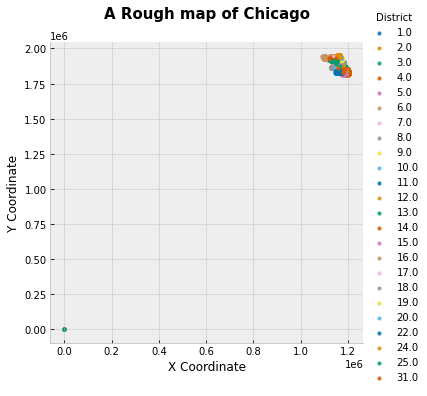

In [ ]:
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df,
           fit_reg=False, 
           hue="District",
           palette='colorblind',
           height=5,
           scatter_kws={"marker": "+", 
                        "s": 10})
ax = plt.gca()
ax.set_title("A Rough map of Chicago\n", fontdict={'fontsize': 15}, weight="bold")
plt.show()

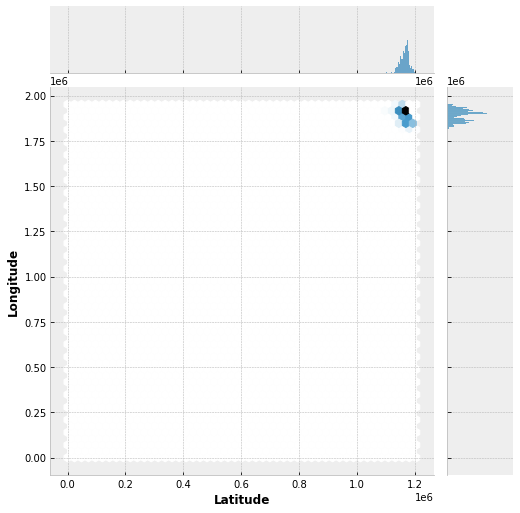

In [ ]:
crime_df = df[df['Primary Type']=='THEFT']

sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values, height=7, kind='hex')

plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
tc = df['Primary Type'].value_counts().sort_values(ascending=False).head()
print(tc)

THEFT              234716
BATTERY            187643
NARCOTICS          109714
CRIMINAL DAMAGE    108508
ASSAULT             63675
Name: Primary Type, dtype: int64


In [ ]:
X = df[['Arrest', 'Domestic', 'Beat', 'Community Area',
                   'Latitude', 'Longitude', 'Year']]
y = df['Primary Type']

In [ ]:
X.head()

,Arrest,Domestic,Beat,Community Area,Latitude,Longitude,Year
0,True,True,1022,29.0,41.864073,-87.706819,2016
1,False,True,313,42.0,41.782922,-87.604363,2016
2,False,False,1524,25.0,41.894908,-87.758372,2016
3,False,False,1532,25.0,41.885687,-87.749516,2016
4,False,True,1523,25.0,41.886297,-87.761751,2016


In [ ]:
y.head()

0                   BATTERY
1                   BATTERY
2    PUBLIC PEACE VIOLATION
3                   BATTERY
4                     THEFT
Name: Primary Type, dtype: object

In [ ]:
X = X.fillna(0)
feature_names = list(X)
target_names = list(y)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [ ]:
clf = OneVsRestClassifier(AdaBoostClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=None),
                    n_jobs=None)

In [ ]:
results = cross_val_score(clf, X, y, cv=3)


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


# Evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.3919631245845736


In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                                   precision    recall  f1-score   support\n\n                            ARSON       0.00      0.00      0.00       471\n                          ASSAULT       0.00      0.00      0.00     21012\n                          BATTERY       0.59      0.49      0.54     62260\n                         BURGLARY       0.27      0.00      0.00     20240\nCONCEALED CARRY LICENSE VIOLATION       0.00      0.00      0.00        10\n              CRIM SEXUAL ASSAULT       0.00      0.00      0.00      1488\n                  CRIMINAL DAMAGE       0.26      0.01      0.02     35791\n                CRIMINAL TRESPASS       0.28      0.00      0.01      9130\n               DECEPTIVE PRACTICE       0.00      0.00      0.00     16055\n                         GAMBLING       0.00      0.00      0.00       616\n                         HOMICIDE       0.00      0.00      0.00        20\n                HUMAN TRAFFICKING       0.00      0.00      0.00         1\n INTERFER

In [ ]:
print(("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))


Accuracy: 34.641% (5.565%)


In [ ]:
import pickle
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)